In [1]:
%pip install tiktoken weaviate-client
%pip install -qU langchain langchain-text-splitters langchain_weaviate langchain-huggingface sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 582.8/582.8 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.8/93.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.2/471.2 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.3/208.3 kB 3.5 MB/s eta 0:00:00


In [2]:
%pip freeze | grep langchain

langchain==1.0.5
langchain-core==1.0.4
langchain-huggingface==1.0.1
langchain-text-splitters==1.0.0
langchain-weaviate==0.0.6


In [3]:
from langchain_huggingface.embeddings import HuggingFaceEmbeddings
from langchain_weaviate.vectorstores import WeaviateVectorStore

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls /content/drive/MyDrive/Papadiamantis/code

 Embeddings.ipynb      'Old Files'    Retrievers.ipynb	 text_splitters.py
 loading_documents.py   __pycache__   Statistics.ipynb


In [6]:
from google.colab import userdata

import sys
import os

module_path = os.path.abspath('/content/drive/MyDrive/Papadiamantis/code')
if module_path not in sys.path:
    sys.path.append(module_path)

from loading_documents import directory_to_documents, num_tokens_from_string

In [7]:
directory_path = "/content/drive/MyDrive/Papadiamantis/data"
documents = directory_to_documents(directory_path)
documents.keys()

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 3/3 [00:04<00:00,  1.66s/it]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00,  1.08it/s]
0it [00:00, ?it/s]
100%|██████████| 16/16 [00:14<00:00,  1.13it/s]


dict_keys(['Άρθρα', 'Διηγήματα', 'Μυθιστορήματα', 'Ποιήματα'])

### Document Analysis

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


documents_df = pd.DataFrame()
for key in documents.keys():
    df = pd.DataFrame([doc.metadata for doc in documents[key]])
    df['Κείμενο'] = [doc.page_content for doc in documents[key]]
    df['tokens'] = df['Κείμενο'].map(num_tokens_from_string)
    df['characters'] = df['Κείμενο'].map(len)
    documents_df = pd.concat([documents_df, df])

documents_df.info()
documents_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 0 to 20
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type        256 non-null    object
 1   theme       256 non-null    object
 2   title       256 non-null    object
 3   year        256 non-null    int64 
 4   chapter     256 non-null    object
 5   Κείμενο     256 non-null    object
 6   tokens      256 non-null    int64 
 7   characters  256 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 18.0+ KB


,type,theme,title,year,chapter,Κείμενο,tokens,characters
0,Άρθρα,Διορθωτικά,ΔΙΟΡΘΩΣΙΣ ΕΠΙΓΡΑΜΜΑΤΟΣ,0,Not applied,ΔΙΟΡΘΩΣΙΣ ΕΠΙΓΡΑΜΜΑΤΟΣ\nΠαπαγεωργίου\nΣοὶ τόνδ...,421,345
1,Άρθρα,Διορθωτικά,ΕΠ᾿ ΕΥΚΑΙΡΙᾼ ΤΗΣ Μ. ΤΕΣΣΑΡΑΚΟΣΤΗΣ,0,Not applied,"ΟΛΙΓΑΙ ΣΗΜΕΙΩΣΕΙΣ ΕΙΣ ΤΟ ΤΡΙῼΔΙΟΝ\nἘν πρώτοις,...",3843,3434
2,Άρθρα,Διορθωτικά,ΕΚΚΛΗΣΙΑΣΤΙΚΑΙ ΕΚΔΟΣΕΙΣ ΕΝ ΑΘΗΝΑΙΣ,0,Not applied,Α´ Ὁ Διδάσκαλος καὶ τὸ «δηλαδὴ»\nἘδημοσιεύθη π...,24908,22167
3,Άρθρα,Μουσικολογικά,ΑΠΟΣΠΑΣΜΑΤΑ ΣΚΕΨΕΩΝ,0,Not applied,Α´ Ἡ Μουσικὴ καὶ τὰ Ἱερὰ Εὐαγγέλια\n\nΑ´ Ἡ Μου...,7629,6757
4,Άρθρα,Μουσικολογικά,Α´ Ἡ Μουσικὴ καὶ τὰ Ἱερὰ Εὐαγγέλια,0,Not applied,...Διὰ τῆς πατροπαραδότου Ἐκκλησιαστικῆς μουσι...,3648,3300


In [9]:
documents_df.type.value_counts()

,count
type,
Διηγήματα,163
Άρθρα,69
Ποιήματα,21
Μυθιστορήματα,3


In [10]:
documents_df[['tokens']].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
tokens,256.0,18873.91,53659.65,120.0,4607.25,8801.5,15753.5,646930.0


In [11]:
for key in documents.keys():
    print('-----', key, '-----')
    print(documents_df[documents_df['type'] == key][['tokens']].describe().round(2).T)
    print('\n')

----- Άρθρα -----
        count    mean      std    min     25%     50%     75%      max
tokens   69.0  6516.3  7076.45  120.0  1780.0  4333.0  7629.0  31800.0


----- Διηγήματα -----
        count      mean       std     min     25%      50%      75%       max
tokens  163.0  18479.83  25358.55  2972.0  7938.5  11508.0  18382.5  204388.0


----- Μυθιστορήματα -----
        count       mean        std       min       25%       50%       75%  \
tokens    3.0  439944.67  197577.35  253358.0  336452.0  419546.0  533238.0   

             max  
tokens  646930.0  


----- Ποιήματα -----
        count     mean     std    min    25%     50%     75%      max
tokens   21.0  2383.24  4514.4  169.0  878.0  1198.0  1882.0  21437.0




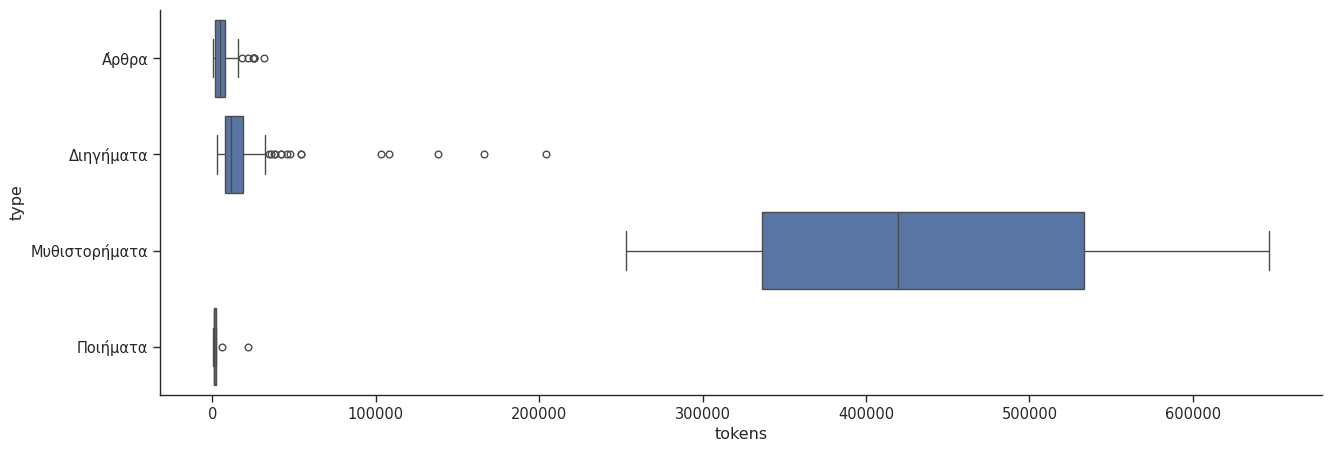

In [12]:
import seaborn as sns
plt.style.use('tableau-colorblind10')
sns.set_theme(context='paper', style='ticks', font_scale=1.2)

plt.figure(figsize=(15,5))
sns.boxplot(data=documents_df, x='tokens', y='type');
sns.despine()

## Using text splitters

In [13]:
from text_splitters import (text_splitter,
                            novel_splitter,
                            article_splitter,
                            short_story_splitter,
                            hymn_splitter)

In [14]:
novels = text_splitter(novel_splitter, documents['Μυθιστορήματα'])
len(novels)

1672

In [15]:
articles = text_splitter(article_splitter, documents['Άρθρα'])
len(articles)

984

In [16]:
stories = text_splitter(short_story_splitter, documents['Διηγήματα'])
len(stories)

4110

In [17]:
poems = text_splitter(hymn_splitter, documents['Ποιήματα'])
len(poems)

137

In [18]:
chunks = novels + articles + stories + poems

In [19]:
len(chunks)

6903

### Chunk Analysis

In [20]:
chunks_df = pd.DataFrame([doc.metadata for doc in chunks])
chunks_df['Κείμενο'] = [doc.page_content for doc in chunks]
chunks_df['length'] = chunks_df['Κείμενο'].map(num_tokens_from_string)
chunks_df.info()
chunks_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6903 entries, 0 to 6902
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   type     6903 non-null   object
 1   theme    6903 non-null   object
 2   title    6903 non-null   object
 3   year     6903 non-null   int64 
 4   chapter  6903 non-null   object
 5   chunk    6903 non-null   int64 
 6   Κείμενο  6903 non-null   object
 7   length   6903 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 431.6+ KB


,type,theme,title,year,chapter,chunk,Κείμενο,length
0,Μυθιστορήματα,Άγνωστη,Ἡ Μετανάστις,1879,Not applied,0,ΠΡΟΛΟΓΟΣ\nὉ τελευταίως ἐνσκήψας ἐν Ἀστραχὰν λο...,678
1,Μυθιστορήματα,Άγνωστη,Ἡ Μετανάστις,1879,Not applied,1,Προσφέρομεν δὲ αὐτὴν τοῖς ἀναγνώσταις τοῦ Νεολ...,814
2,Μυθιστορήματα,Άγνωστη,Ἡ Μετανάστις,1879,Not applied,2,"Δὲν ἠκούοντο πλέον ὀδυρμοὶ καὶ θρῆνοι, δὲν ἠκο...",884
3,Μυθιστορήματα,Άγνωστη,Ἡ Μετανάστις,1879,Not applied,3,Διότι πρὸ τῆς ἐνσκήψεως τοῦ δεινοῦ ὁ κληρικὸς ...,942
4,Μυθιστορήματα,Άγνωστη,Ἡ Μετανάστις,1879,Not applied,4,"Ὁ γέρων προεπορεύετο πεντήκοντα βήματα, ἠναγκά...",969


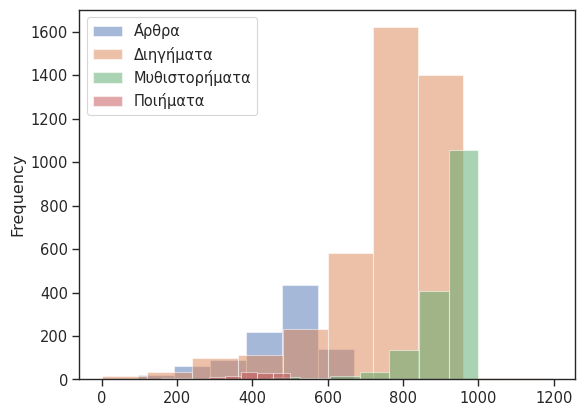

In [21]:
chunks_df.groupby('type').length.plot.hist(legend=True, alpha=0.5);

In [22]:
chunks_df

,type,theme,title,year,chapter,chunk,Κείμενο,length
0,Μυθιστορήματα,Άγνωστη,Ἡ Μετανάστις,1879,Not applied,0,ΠΡΟΛΟΓΟΣ\nὉ τελευταίως ἐνσκήψας ἐν Ἀστραχὰν λο...,678
1,Μυθιστορήματα,Άγνωστη,Ἡ Μετανάστις,1879,Not applied,1,Προσφέρομεν δὲ αὐτὴν τοῖς ἀναγνώσταις τοῦ Νεολ...,814
2,Μυθιστορήματα,Άγνωστη,Ἡ Μετανάστις,1879,Not applied,2,"Δὲν ἠκούοντο πλέον ὀδυρμοὶ καὶ θρῆνοι, δὲν ἠκο...",884
3,Μυθιστορήματα,Άγνωστη,Ἡ Μετανάστις,1879,Not applied,3,Διότι πρὸ τῆς ἐνσκήψεως τοῦ δεινοῦ ὁ κληρικὸς ...,942
4,Μυθιστορήματα,Άγνωστη,Ἡ Μετανάστις,1879,Not applied,4,"Ὁ γέρων προεπορεύετο πεντήκοντα βήματα, ἠναγκά...",969
...,...,...,...,...,...,...,...,...
6898,Ποιήματα,Ποιήματα,ΤΟ ΩΡΑΙΟΝ ΦΑΣΜΑ,0,Not applied,1,"Δὲ μένει σ᾿ ὅλο αὐτὸ τὸ θεῖον ᾆσμα, στὴν ἁρμον...",439
6899,Ποιήματα,Ποιήματα,ΤΟ ΩΡΑΙΟΝ ΦΑΣΜΑ,0,Not applied,2,"Δὲν εἶσαι πλιὰ τὸ θεῖο ἐκεῖνο πλάσμα, κι ἀπόμε...",464
6900,Ποιήματα,Ποιήματα,ΤΟ ΩΡΑΙΟΝ ΦΑΣΜΑ,0,Not applied,3,"Βοριὰς φυσάει σὰ θλιμμένο ᾆσμα, τὴ νιότη σου θ...",449
6901,Ποιήματα,Ποιήματα,ΣΤΟΝ ΠΡΟΔΡΟΜΟΝ ΤΟΥ ΚΑΣΤΡΟΥ,0,Not applied,0,". Κατόπι στὴν ἁρμάθα τῶν γραιῶν, στὴν ἁλυσίδα ...",453


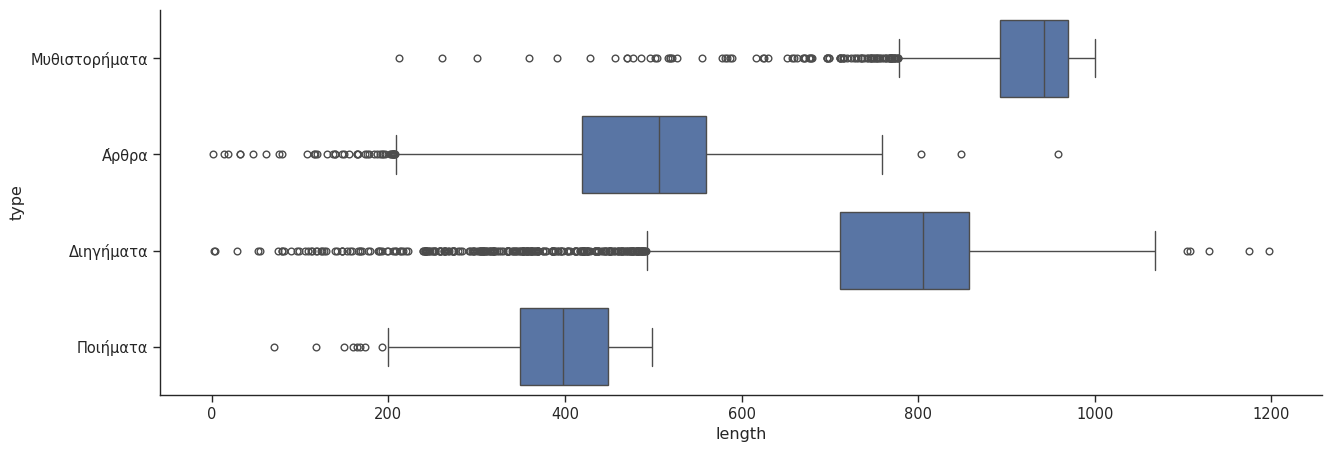

In [23]:
plt.figure(figsize=(15,5))
sns.boxplot(data=chunks_df, x='length', y='type');
sns.despine()

## Creating Embeddings and storing them

In [24]:
import weaviate
from weaviate.classes.init import Auth

# Best practice: store your credentials in environment variables
weaviate_url = userdata.get("WEAVIATE_URL")
weaviate_api_key = userdata.get("WEAVIATE_API_KEY")

# Connect to Weaviate Cloud
weaviate_client = weaviate.connect_to_weaviate_cloud(
    cluster_url=weaviate_url,
    auth_credentials=Auth.api_key(weaviate_api_key),
)

print(weaviate_client.is_ready())  # Should print: `True`

True


In [25]:
embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-m3", show_progress=True)

for name, docs in [("novels", novels), ("stories", stories), ("articles", articles), ("poems", poems)]:
    vectorstore = WeaviateVectorStore.from_documents(
    docs, embeddings, client=weaviate_client, tenant=name, index_name='PapadiamantisLangchain', text_key='text')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

2025-Nov-08 09:56 PM - langchain_weaviate.vectorstores - INFO - Tenant novels does not exist in index PapadiamantisLangchain. Creating tenant.
INFO:langchain_weaviate.vectorstores:Tenant novels does not exist in index PapadiamantisLangchain. Creating tenant.


Batches:   0%|          | 0/53 [00:00<?, ?it/s]

2025-Nov-08 09:59 PM - langchain_weaviate.vectorstores - INFO - Tenant stories does not exist in index PapadiamantisLangchain. Creating tenant.
INFO:langchain_weaviate.vectorstores:Tenant stories does not exist in index PapadiamantisLangchain. Creating tenant.


Batches:   0%|          | 0/129 [00:00<?, ?it/s]

2025-Nov-08 10:04 PM - langchain_weaviate.vectorstores - INFO - Tenant articles does not exist in index PapadiamantisLangchain. Creating tenant.
INFO:langchain_weaviate.vectorstores:Tenant articles does not exist in index PapadiamantisLangchain. Creating tenant.


Batches:   0%|          | 0/31 [00:00<?, ?it/s]

2025-Nov-08 10:05 PM - langchain_weaviate.vectorstores - INFO - Tenant poems does not exist in index PapadiamantisLangchain. Creating tenant.
INFO:langchain_weaviate.vectorstores:Tenant poems does not exist in index PapadiamantisLangchain. Creating tenant.


Batches:   0%|          | 0/5 [00:00<?, ?it/s]